В этом занятии:


* Познакомимся с реализацией алгоритма случайного леса для задач многоклассовой классификации из _sklearn_.

* Поймем, как выбирать оптимальное количество деревьев, составляющих случайный лес.

* Предскажем стоимость автомобиля на вторичном рынке.

* Научимся использовать алгоритм случайного леса для задач регрессии.

___

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as mk

# Случайные леса - Классификация

## Данные


Мы будем использовать тот же набор данных, который использовали при изучении решающих деревьев.

Работать будем с классификацией [звезд](https://www.kaggle.com/datasets/deepu1109/star-dataset).
Необходимый СSV файл содержит набор данных из 240 звезд, разделенных на 6 классов:

* Коричневый карлик -> Тип звезды = 0

* Красный карлик -> Тип звезды = 1

* Белый карлик-> Тип звезды = 2

* Основная последовательность -> Тип звезды = 3

* Сверхгигант -> Тип звезды = 4

* Гипергигант -> Тип звезды = 5

**Наша цель - создать модель, которая поможет нам определять тип звезды на основе физических признаков, чтобы исследователи могли с помощью этой модели выполнять классификацию без привлечения опытного астронома.**

In [ ]:
df = pd.read_csv("./star_set.csv")
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


## Разбиение данных на обучающую и тестовую выборки

In [ ]:
features = pd.get_dummies(df.drop('Star type', axis=1), drop_first=True)
targets = df['Star type']

In [ ]:
from sklearn.model_selection import train_test_split
feat_train, feat_test, tar_train, tar_test = train_test_split(features, targets, test_size=0.77, random_state=40)

## RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  For a comparison between tree-based ensemble models see the example
 |  :ref:`sp

Используем модель, состоящую из 5 случайных деревьев

In [ ]:
model = RandomForestClassifier(n_estimators=5, random_state=40)
model.fit(feat_train, tar_train)

RandomForestClassifier(n_estimators=5, random_state=40)

Оценим точность классификации по взвешенной _f1-мере_

In [ ]:
preds = model.predict(feat_test)
mk.f1_score(preds, tar_test, average="weighted")

0.925982433705

Рассмотрим подробнее матрицу классификации

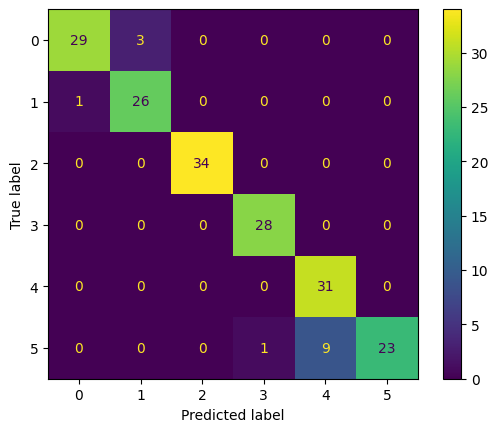

In [ ]:
from sklearn import metrics as mk
mk.ConfusionMatrixDisplay.from_estimator(model, feat_test, tar_test);

### **[Задание 1]**

Найдите пару наиболее важных признаков, согласно модели.

In [ ]:
# Решение


## Выбираем правильное количество деревьев

Давайте посмотрим, как меняется точность прогноза модели при изменении количества деревьев.

In [ ]:
test_score = []

for n in range(1, 40):
    # Используем n случайных деревьев
    model = RandomForestClassifier(n_estimators=n, random_state=40)
    model.fit(feat_train, tar_train)
    test_preds = model.predict(feat_test)
    test_score.append(mk.f1_score(test_preds, tar_test, average="weighted"))

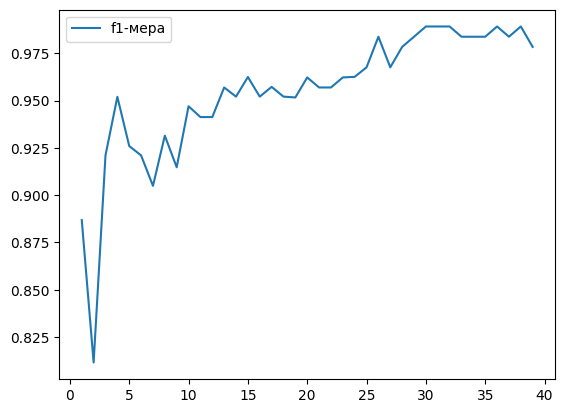

In [ ]:
plt.plot(range(1, 40), test_score, label='f1-мера')
plt.legend();

Здесь ясно видно, что мы получаем всё меньше пользы при добавлении дополнительных деревьев. Для такого набора данных, мы, по сути, уже извлекли всю нужную информацию с помощью примерно 30-35 деревьев.

# Случайные леса - Регрессия

Случайные деревья можно использовать не только для классификации, но и регрессии. На основе [набора данных](https://www.kaggle.com/datasets/mayankpatel14/second-hand-used-cars-data-set-linear-regression) рассмотрим применение такого алгоритма.


**Наша цель - создать модель, которая поможет нам определять примерную стоимость собственного автомобиля на основе имеющейся информации без привлечения опытного оценщика**


## Импорт данных

In [ ]:
df = pd.read_csv("./train.csv")
df = df.drop('v.id', axis=1)
df.head()

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,691388,811335,6,61559,3,9,12,160,53,105,531114.5


## Разбиение данных на обучающую и тестовую выборки

In [ ]:
from sklearn.model_selection import train_test_split

feature = df.drop("current price", axis=1)
target = df["current price"]


feat_train, feat_test, tar_train, tar_test = train_test_split(feature, target, test_size=0.3, random_state=42)

### **[Задание 2]**

Нарисуйте график зависимости _r2-метрики_ от количества деревьев, полагая что _random_state=40_. Определите примерный диапазон оптимального значения параметра n_estimators. Используйте модель RandomForestRegressor.

In [ ]:
# Решение

## Поиск оптимальных параметров

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [25, 30, 45],
             'max_features': ['sqrt', 'log2', None],
             'bootstrap': [True, False],
             'min_samples_split': [2, 4, 8]}


randFR = RandomForestRegressor(random_state=40)
grid = GridSearchCV(randFR, param_grid)
grid.fit(feat_train, tar_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=40),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [25, 30, 45]})

Оценим модель через метрику _r2_

In [ ]:
prediction = grid.best_estimator_.predict(feat_test)
print(mk.r2_score(tar_test, prediction))

0.9772438155046596


### **[Задание 3]**

Найдите, на сколько процентов отличается прогноз стоимости машины от ее недавней стоимости, если данные интересующей нас машины занесены в 740 строку исходного датасета

In [ ]:
# Решение
